# Credit Card Fraud Detection in an Unbalanced Dataset

### Let us Import the necessary packets and Load the Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
data = pd.read_csv("creditcard.csv")
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

*The Dataset is successfully imported and now let us check that if there is any missing values in the Dataset*

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Thus from this we infer that there is no null values in the dataset.**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data[["Amount","Time","Class"]].describe()

Amount           Time          Class
count  284807.000000  284807.000000  284807.000000
mean       88.349619   94813.859575       0.001727
std       250.120109   47488.145955       0.041527
min         0.000000       0.000000       0.000000
25%         5.600000   54201.500000       0.000000
50%        22.000000   84692.000000       0.000000
75%        77.165000  139320.500000       0.000000
max     25691.160000  172792.000000       1.000000

**The is only three observable Features Amount,Time,Class. And the remaining Features are given as the Scaled value itself, for the Because it contains the Confidential informations.**

# Now let us visulaize to our loaded Dataset to find or analyze the patterns or the relationship between the Features

**First let us analyze the known features [Class,Amount,Time]**

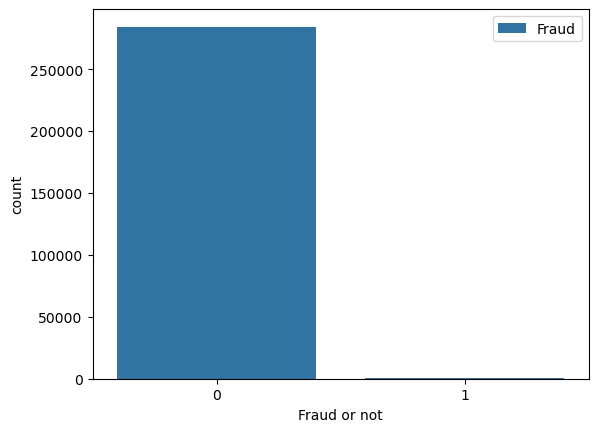

In [13]:
sns.countplot(data,x="Class",label = "Fraud")
plt.xlabel("Fraud or not")
plt.legend()
plt.show()

**From this we infer that our Dependent Variable Class indicates 0 or 1 which is a binary data where 1 indicates that There is the occurance of the Credit card Fraud, and then the 0 indicates that there is no occurance of Fraud takes place.**

*Let us analyze the distribution of other features also.*

**Now let us split the independent variable 'Class' into two different variables and compare with the Other features.**

In [17]:
import plotly.figure_factory as ff
time_class_0 = data.loc[data["Class"] == 0]["Time"]
time_class_1 = data.loc[data["Class"] == 1]["Time"]
dist_var = [time_class_0,time_class_1]
dist = ["Valid Transaction","Fraudlant Transactions"]
fig = ff.create_distplot(dist_var,dist,show_hist = False,show_rug = False)
fig.update_layout(height = 500,template = "plotly_dark")
fig.show()

**From this we infer that the Fraudlent plot is like a normally distriubuted than the Non Fraudlent**

**To explore more let us convert the Time from seconds to hours.**

In [20]:
data["Hours"] = data["Time"].apply(lambda x : np.floor(x/3600))
temp = data.groupby(["Hours","Class"])["Amount"].aggregate(['min','max','count','mean','median','sum','var']).reset_index()
df = pd.DataFrame(temp)
df.columns = ["Hours","Class","min","max","count","mean","median","sum","var"]
df.head()

Hours  Class   min      max  count        mean   median        sum  \
0    0.0      0   0.0  7712.43   3961   64.774772   12.990  256572.87   
1    0.0      1   0.0   529.00      2  264.500000  264.500     529.00   
2    1.0      0   0.0  1769.69   2215   65.826980   22.820  145806.76   
3    1.0      1  59.0   239.93      2  149.465000  149.465     298.93   
4    2.0      0   0.0  4002.88   1555   68.803466   17.900  106989.39   

             var  
0   45615.821201  
1  139920.500000  
2   20053.615770  
3   16367.832450  
4   45355.430437

In [21]:
from plotly.subplots import make_subplots
fig = make_subplots(rows = 1,cols = 2)
fig.add_trace(
    go.Scatter(x = temp[temp["Class"] == 0]["Hours"],
               y = temp[temp["Class"]==0]["min"], 
               mode = 'lines',line = dict(color = "blue")),
               row = 1,
               col = 1
)
fig.add_trace(
    go.Scatter(x=temp[temp["Class"]==1]["Hours"],
    y = temp[temp["Class"] == 1]["min"],
    mode = 'lines',
    line = dict(color = "red")),
    row = 1,
    col = 2
)
fig.update_layout(
    template="plotly_dark",
    title_text = "Plot with the Hours and Min Amount with respect to the Fraudlent and Not Fraudlent Transactions",
    xaxis1_title = "Non Fraudlent Hour",
    yaxis1_title= "Min Value of the Amount ",
    xaxis2_title="Fraudlent Hour",
    yaxis2_title = "Min Value of the Amount"
)
fig.show()

In [22]:
fig = make_subplots(rows = 1,cols = 2)
fig.add_trace(
    go.Scatter(x = temp[temp["Class"] == 0]["Hours"],
              y=temp[temp["Class"] == 0]["max"],
              mode = "lines",line = dict(color = "blue")),
    row = 1,col = 1
)
fig.add_trace(
    go.Scatter(x = temp[temp["Class"]==0]["Hours"],y= temp[temp["Class"]==1]["max"],
             mode = 'lines',line = dict(color = "red")),row = 1,col = 2)
fig.update_layout(template= "plotly_dark",title_text = "plot with the Fraudlent and Non Fraudlent Hours with the max amount shared",
                 xaxis1_title = "Non Fraudlent Hour",
                 yaxis1_title = "Max Amount Transactioned",
                 xaxis2_title = "Fraudlent Hour",
                 yaxis2_title = "Max Amount Transanctioned")
fig.show()

In [23]:
fig = make_subplots(rows = 1,cols = 2)
fig.add_trace( go.Scatter(
    x = temp[temp["Class"]==0]["Hours"],y=temp[temp["Class"]==0]["count"],mode = "lines",
    line = dict(color = "blue")),row = 1,col =1
)
fig.add_trace(go.Scatter(x = temp[temp["Class"]==1]["Hours"],y=temp[temp["Class"]==1]["count"],mode = "lines",
              line = dict(color = "red")),row = 1,col = 2
)
fig.update_layout(template="plotly_dark",title_text = "Non Fraudlent and Fraudlent Transaction hours vs the Amount Count",
                 xaxis1_title = "Non Fraudlent Hour",
                 yaxis1_title ="Count of the amount(Transaction)",
                 xaxis2_title = "Fraudlent Hour",
                 yaxis2_title = "Transcation ")
fig.show()

In [24]:
fig = make_subplots(rows = 1,cols = 2)
fig.add_trace(
    go.Scatter(x = temp[temp["Class"]==0]["Hours"],y = temp[temp["Class"]==0]["mean"],mode = "lines",
              line = dict(color = "blue")),row = 1, col = 1
)
fig.add_trace(
    go.Scatter(x = temp[temp["Class"]==1]["Hours"],y=temp[temp["Class"]==1]["mean"],mode = "lines",
              line = dict(color = "red")),row = 1,col = 2
)
fig.update_layout(template = "plotly_dark",
                 xaxis1_title = "Non Fraudlent Hours of Transaction",
                 yaxis1_title = "Mean of the amount",
                 xaxis2_title = "Fraudlent Hour",
                 yaxis2_title = "Mean of the amount",
                 title = "Fraudlent and Non Fradlent Transactions hours vs the Mean of the Amount")
fig.show()

In [25]:
fig = make_subplots(rows = 1,cols = 2)
fig.add_trace(
    go.Scatter(x = temp[temp["Class"]==0]["Hours"],y = temp[temp["Class"]==0]["median"],mode = "lines",
              line = dict(color = "blue")),row = 1, col = 1
)
fig.add_trace(
    go.Scatter(x = temp[temp["Class"]==1]["Hours"],y=temp[temp["Class"]==1]["median"],mode = "lines",
              line = dict(color = "red")),row = 1,col = 2
)
fig.update_layout(template = "plotly_dark",
                 xaxis1_title = "Non Fraudlent Hours of Transaction",
                 yaxis1_title = "Median of the amount",
                 xaxis2_title = "Fraudlent Hour",
                 yaxis2_title = "Median of the amount",
                 title = "Fraudlent and Non Fradlent Transactions hours vs the Mean of the Amount")
fig.show()

In [26]:
fig = make_subplots(rows = 1,cols = 2)
fig.add_trace(
    go.Scatter(x = temp[temp["Class"]==0]["Hours"],y = temp[temp["Class"]==0]["sum"],mode = "lines",
              line = dict(color = "blue")),row = 1, col = 1
)
fig.add_trace(
    go.Scatter(x = temp[temp["Class"]==1]["Hours"],y=temp[temp["Class"]==1]["sum"],mode = "lines",
              line = dict(color = "red")),row = 1,col = 2
)
fig.update_layout(template = "plotly_dark",
                 xaxis1_title = "Non Fraudlent Hours of Transaction",
                 yaxis1_title = "sum of the amount",
                 xaxis2_title = "Fraudlent Hour",
                 yaxis2_title = "sum of the amount",
                 title = "Fraudlent and Non Fradlent Transactions hours vs the Mean of the Amount")
fig.show()

In [27]:
fig = make_subplots(rows = 1,cols = 2)
fig.add_trace(
    go.Scatter(x = temp[temp["Class"]==0]["Hours"],y = temp[temp["Class"]==0]["var"],mode = "lines",
              line = dict(color = "blue")),row = 1, col = 1
)
fig.add_trace(
    go.Scatter(x = temp[temp["Class"]==1]["Hours"],y=temp[temp["Class"]==1]["var"],mode = "lines",
              line = dict(color = "red")),row = 1,col = 2
)
fig.update_layout(template = "plotly_dark",
                 xaxis1_title = "Non Fraudlent Hours of Transaction",
                 yaxis1_title = "Variance of the amount",
                 xaxis2_title = "Fraudlent Hour",
                 yaxis2_title = "Variance of the amount",
                 title = "Fraudlent and Non Fradlent Transactions hours vs the Mean of the Amount")
fig.show()

**Thus the Various Distirbutions and patterns of the Transaction Hours and the Various aggregate Metrics are compared to analyze the Distributions**

**Now let us Try to Analyz he Outliers In both the Fraudlent and Non Fraudlent Transactions**

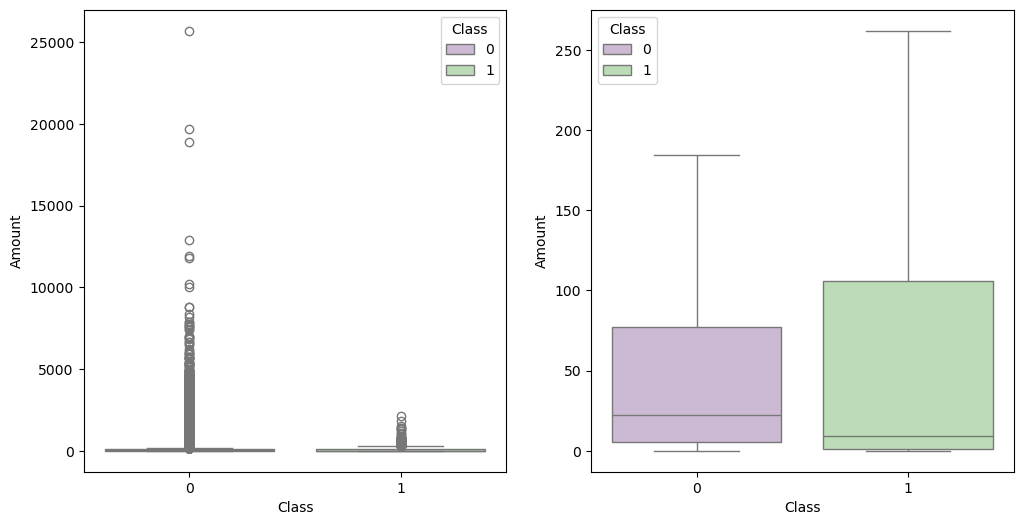

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=False)
plt.show();

**Now let us seperate or Group the Amount Feature with respect to the Class 0 and 1**

In [32]:
temp = data[["Amount","Class"]].copy()
fraud_amount = temp.loc[temp["Class"] == 1]["Amount"]
non_fraud_amount = temp.loc[temp["Class"]==0]["Amount"]
fraud_amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [33]:
non_fraud_amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [34]:
fraud = data.loc[data["Class"]==1]
fig = px.scatter(fraud,x="Time",y="Amount",color_discrete_sequence=["orange"],title = "Time vs Amount In the Fraudlent Transaction")
fig.update_layout(template = "plotly_dark")
fig.show()

**Now the Let us understand the Correlation between all the Features of our scaled Dataset that would give us a better understanding of the Dataset to the further Process**

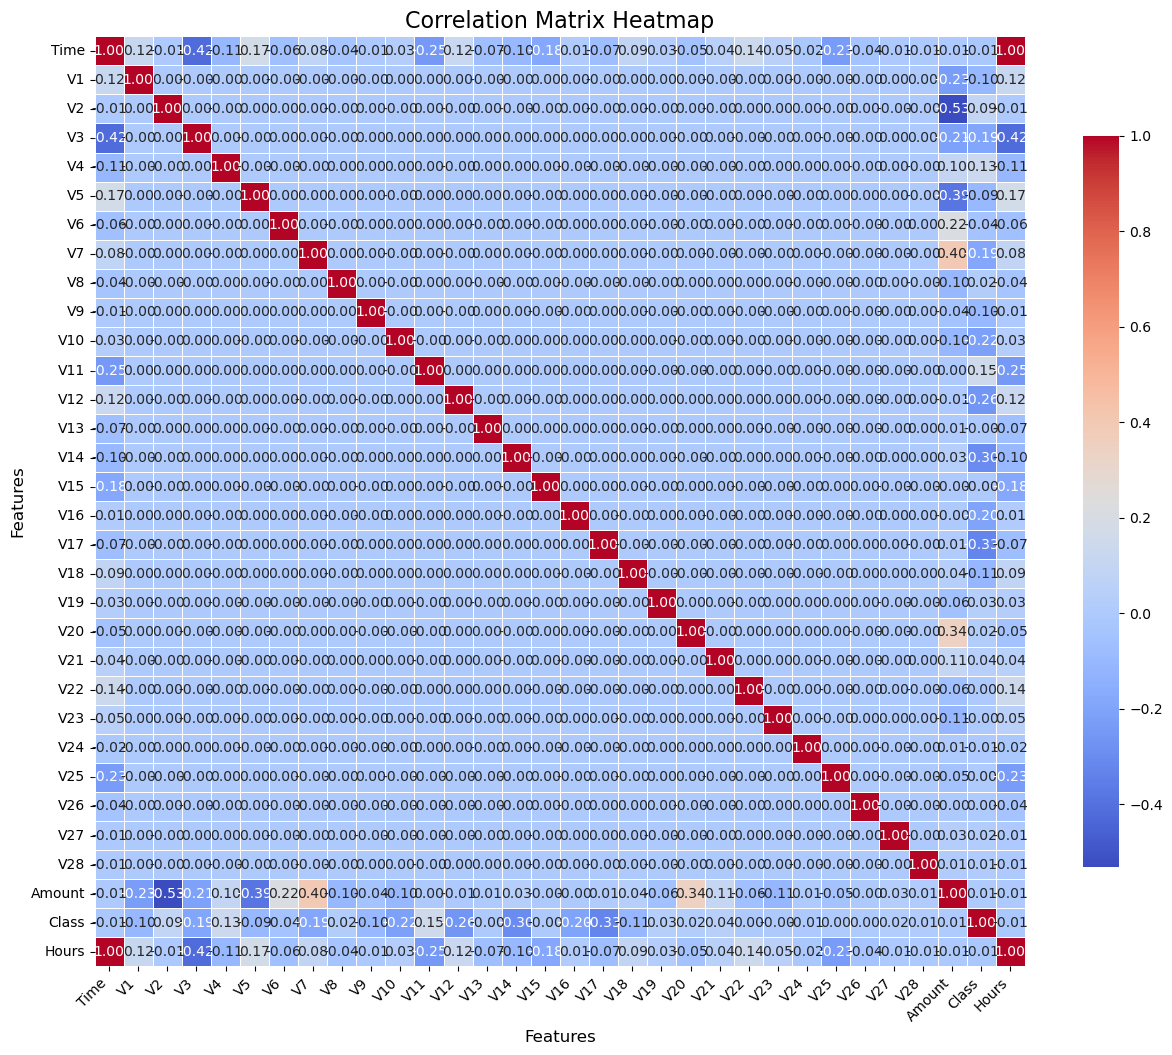

In [36]:
corr_data = data.corr()
plt.figure(figsize=(15,19))
sns.heatmap(corr_data,fmt ='.2f',cmap = 'coolwarm',linewidths = 0.5,cbar_kws={'shrink': 0.5},square=True,annot = True)
plt.title('Correlation Matrix Heatmap', fontsize=16) 
plt.xlabel('Features', fontsize=12) 
plt.ylabel('Features', fontsize=12) 
plt.xticks(rotation=45, ha='right')
plt.show()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

Let's plot the correlated and inverse correlated values on the same graph.

Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.

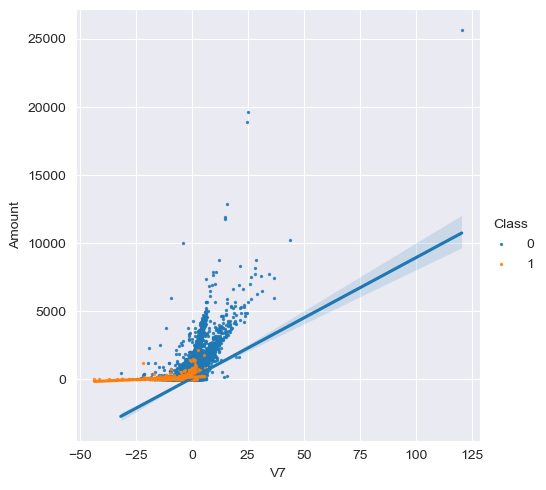

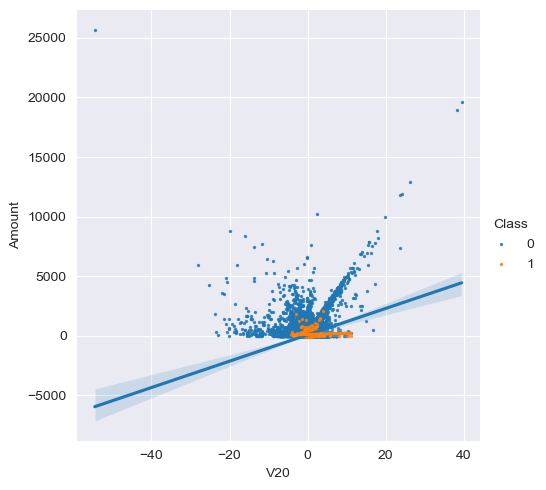

In [99]:
sns.set_style("darkgrid")
sns.lmplot(data,x="V7",y="Amount",hue = "Class",fit_reg=True,scatter_kws={'s':2})
plt.show()
sns.set_style("darkgrid")
sns.lmplot(data,x="V20",y="Amount",hue = "Class",fit_reg= True,scatter_kws = {'s':2})
plt.show()

**By this Scatter plot we infer that Both the V20 and V7 has Positive Slopes. For class == 0 It is highly positive slope and for class == 1 there is a minimal positive slope**

**I assume that by the Heatmap visulaization V2 and V5 are in Grey in color means that it may have negative correlation with the Independent variable.**

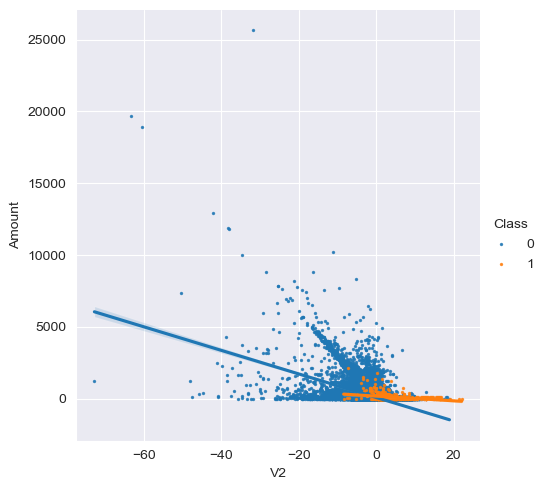

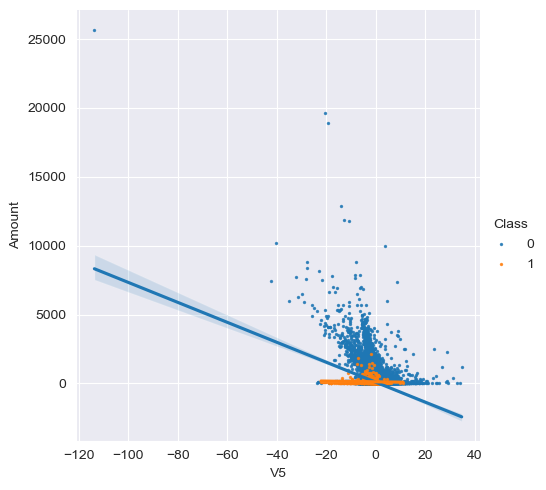

In [41]:
sns.set_style("darkgrid")
sns.lmplot(data,x = "V2",y="Amount",hue="Class",fit_reg= True,scatter_kws = {'s':2})
sns.lmplot(data,x="V5",y="Amount",hue="Class",fit_reg=True,scatter_kws = {'s':2})
plt.show()

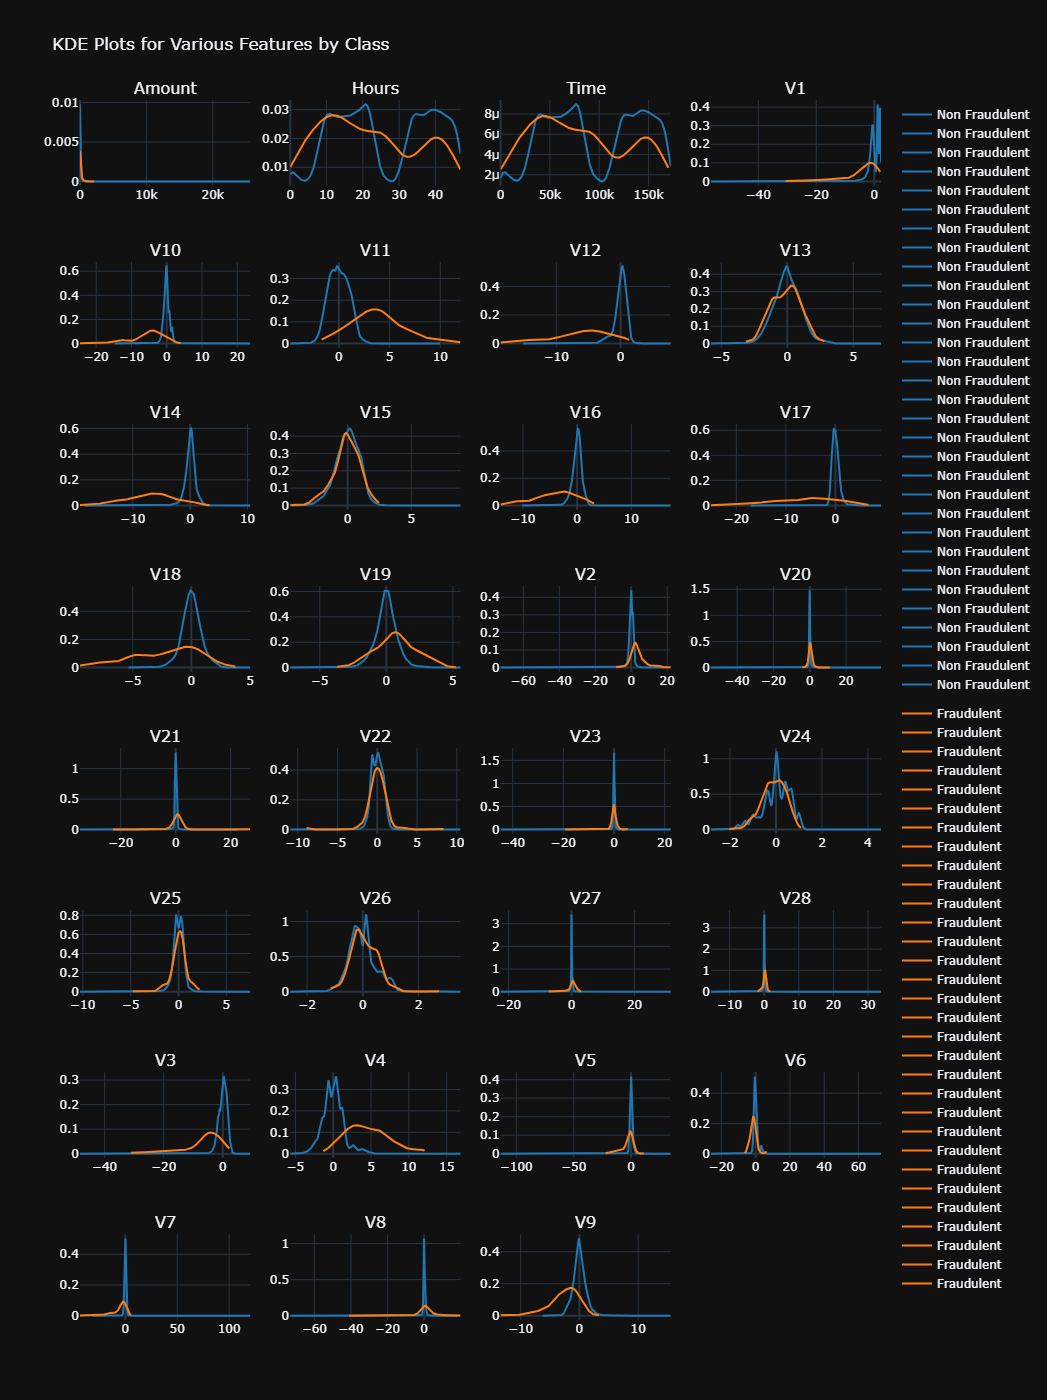

In [42]:
features = data.columns.difference(['Class'])
feature_class_0 = data[data["Class"]==0]
feature_class_1 = data[data["Class"]==1]
fig = make_subplots(rows = 8,cols=4,subplot_titles= list(features))
row,col = 1,1
for feature in features:
    feature_0 = feature_class_0[feature]
    feature_1=feature_class_1[feature]
    hist_data = [feature_0,feature_1]
    display = ["Non Fraudulent","Fraudulent"]
    distplot = ff.create_distplot(hist_data,display,show_rug=False,show_hist = False)
    for trace in distplot["data"]:
        fig.add_trace(trace,row = row,col =col)
    col+=1
    if col>4:
        col = 1
        row+=1
fig.update_layout( template='plotly_dark', 
                  height=1400, 
                  title='KDE Plots for Various Features by Class' ) 
fig.show()

**For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.
In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.**

## The Feature Engineering and Visulaizations are done enough to understand the patterns amoung the features of the dataset and now let us move forward to train the model and build the predictive model with high accuracy as much as possible.

### Let us split our data as dependent and Independent Variables

In [46]:
x = data.drop(columns = "Class")
y = data["Class"]

# Predictive Model

## Let us Do train two Models Logistic Regressor and GradientBoost Classifier Algorithm

**Before that As we now that our Dataset is Imbalanced to Overcome that we should use a special algorithm to resample our Dataset and it is called as SMOTE (Synthetic Minority Oversampling Technique)**

## SMOTE (Synthetic Minority Oversampling Technique):

In [51]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.25,random_state=42)

In [52]:
smote = SMOTE(random_state = 42)
x_train_resampled,y_train_resampled = smote.fit_resample(x_train,y_train)

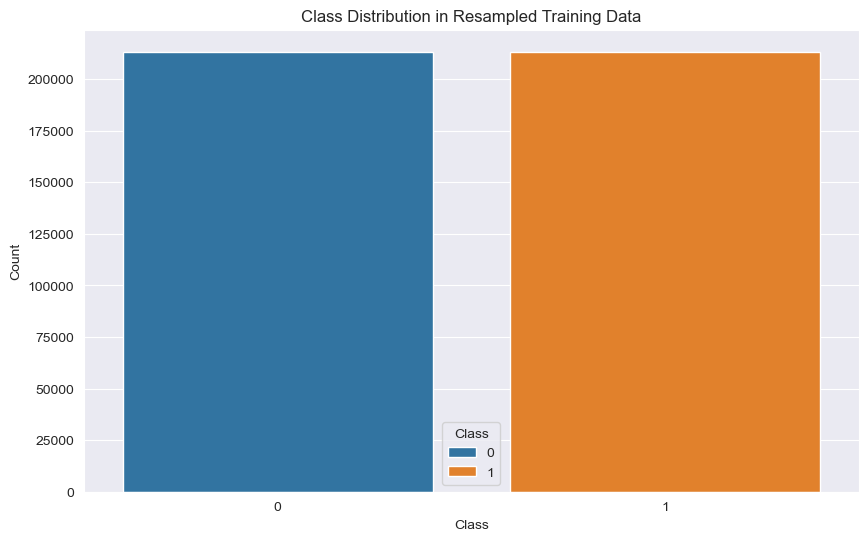

In [53]:
x_train_resampled_df = pd.DataFrame(x_train_resampled, columns=x_train.columns) 
x_train_resampled_df['Class'] = y_train_resampled 
sns.set_style('darkgrid') 
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Class', data=x_train_resampled_df,hue = "Class") 
plt.title('Class Distribution in Resampled Training Data') 
plt.xlabel('Class') 
plt.ylabel('Count') 
plt.show()

**From this we clearly see that our Imbalanced Dataset is not Balanced which is very suitable for Predict using any Algorithms.**

*LogisticRegression(
    penalty='l2',  
    dual=False, 
    tol=0.0001, 
    C=1.0, 
    fit_intercept=True, 
    intercept_scaling=1, 
    class_weight=None, 
    random_state=None, 
    solver='lbfgs', 
    max_iter=100, 
    multi_class='deprecated', 
    verbose=0, 
    warm_start=False, 
    n_jobs=None, 
    l1_ratio=None)
These are the Parameters of the Logistic Regressions We could Modify Those Parameters to get the High Accuracy and Precision Scores*

After listing some possible Best paramet Grids in a dict Paramgrid Lets Use the GridSearchCV to Find the Best Parameters.

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200]
}
logreg = LogisticRegression() 
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1) 
grid_search.fit(x_train_resampled, y_train_resampled) 
print("Best Parameters:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.979594422322533


In [69]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,confusion_matrix
logreg.fit(x_train_resampled, y_train_resampled)
y_predTest = logreg.predict(x_test)
y_predTrain = logreg.predict(x_train_resampled)
print("\nAccuracy Score:")
print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_predTrain)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predTest)}")
print("\nRecall Score:")
print(f"Train Recall score: {recall_score(y_train_resampled, y_predTrain)}")
print(f"Test Recall score: {recall_score(y_test, y_predTest)}")
print(f"Test Classification Report: {classification_report(y_test, y_predTest)}")

C:\Users\vinu0\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Accuracy Score:
Train Accuracy: 0.9720671963081425
Test Accuracy: 0.9808853683885285

Recall Score:
Train Accuracy: 0.9632221211296934
Test Accuracy: 0.9026548672566371

Total classification Report:
Test Accuracy:               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71089
           1       0.07      0.90      0.13       113

    accuracy                           0.98     71202
   macro avg       0.54      0.94      0.56     71202
weighted avg       1.00      0.98      0.99     71202



**Thus some of the metrics are tested for the built model and Scores are also good to see.**

## Gradient Boosting

Now Let us Train A Classifier Algorithm to check the metric scores

In [81]:
GBC = GradientBoostingClassifier(n_estimators=500, 
                                 learning_rate=0.1,
                                 max_depth=4,
                                 min_samples_split=3,
                                 subsample=0.7,
                                 min_samples_leaf=2,
                                 max_features=0.7,
                                 random_state=42)
GBC.fit(x_train_resampled, y_train_resampled)
y_predTrain = GBC.predict(x_train_resampled)
y_predTest = GBC.predict(x_test)
print("\nAccuracy Score:")
print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_predTrain)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predTest)}")
print("\nPrecision Score:")
print(f"Train Precision: {precision_score(y_train_resampled, y_predTrain)}")
print(f"Test Precision: {precision_score(y_test, y_predTest)}")
print("\nRecall Score:")
print(f"Train Recall: {recall_score(y_train_resampled, y_predTrain)}")
print(f"Test Recall: {recall_score(y_test, y_predTest)}")
print("\nClassification Report:")
print(f"Classification Report:\n{classification_report(y_test, y_predTest)}")


Accuracy Score:
Train Accuracy: 0.9999624811233152
Test Accuracy: 0.9989747479003399

Precision Score:
Train Precision: 0.9999624811233152
Test Precision: 0.6298701298701299

Recall Score:
Train Recall: 0.9999624811233152
Test Recall: 0.8584070796460177

Classification Report:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.63      0.86      0.73       113

    accuracy                           1.00     71202
   macro avg       0.81      0.93      0.86     71202
weighted avg       1.00      1.00      1.00     71202



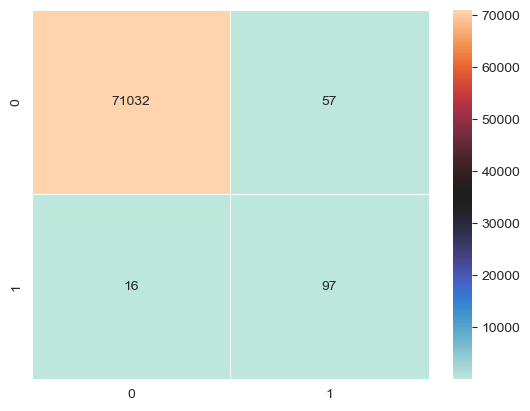

In [96]:
con_mat = confusion_matrix(y_test, y_predTest)
sns.heatmap(con_mat,annot=True,fmt='g',cmap = 'icefire',linewidth = 0.5)
plt.show()

# Thus We have successfully trained a predictive models both in the Linear and Ensemble models, in an Imbalanced Dataset.